In [ ]:
#Use the file "scaled_df.csv"
filename = input("Enter the filename: ")

In [21]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [22]:
df = pd.read_csv(filename)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.152255,0.201391
3,1,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,6.046041,4.935010
4,1,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.868353,-0.397100


In [23]:
correlation_matrix = df.corr()
correlation_matrix

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.358560,0.596534,0.330499,-0.012838,0.567134,-0.008303,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.421465,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.105008,0.119205
smoothness_mean,0.358560,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.510223,0.687382
symmetry_mean,0.330499,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.699826,0.438413
fractal_dimension_mean,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.334019,0.767297
radius_se,0.567134,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.094543,0.049559
texture_se,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.128215,-0.045655
smoothness_se,-0.067016,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,-0.107342,0.101480


In [24]:
# Malignant = 1
# Benign = 0

In [25]:
#Calculate the correlation of all the features to their target labels.

correlation_matrix["diagnosis"].sort_values(ascending=False)

diagnosis                  1.000000
radius_mean                0.730029
compactness_mean           0.596534
radius_se                  0.567134
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64

In [26]:
threshold  = 0.4
if threshold > correlation_matrix["diagnosis"].sort_values(ascending=False)[0]:
    print("The best features are:")
    print(correlation_matrix["diagnosis"].sort_values(ascending=False)[0])

In [27]:
for feature, corr in correlation_matrix["diagnosis"].sort_values(ascending=False).items():
    if abs(corr) >= threshold:
        print(f"{feature} : {corr:.3f}")



diagnosis : 1.000
radius_mean : 0.730
compactness_mean : 0.597
radius_se : 0.567
smoothness_worst : 0.421
symmetry_worst : 0.416
texture_mean : 0.415
concave points_se : 0.408


In [28]:
df_features = df[["radius_mean", "compactness_mean", "radius_se", "smoothness_worst", "symmetry_worst", "texture_mean", "concave points_se"]]
df_features.head(4)

,radius_mean,compactness_mean,radius_se,smoothness_worst,symmetry_worst,texture_mean,concave points_se
0,1.097064,3.283515,2.489734,1.307686,2.750622,-2.073335,0.660820
1,1.829821,-0.487072,0.499255,-0.375612,-0.243890,-0.353632,0.260162
2,1.579888,1.052926,1.228676,0.527407,1.152255,0.456187,1.424827
3,-0.768909,3.402909,0.326373,3.394275,6.046041,0.253732,1.115007


In [29]:
new_df =pd.concat([df_features, df["diagnosis"]], axis=1)
new_df.head()

,radius_mean,compactness_mean,radius_se,smoothness_worst,symmetry_worst,texture_mean,concave points_se,diagnosis
0,1.097064,3.283515,2.489734,1.307686,2.750622,-2.073335,0.660820,1
1,1.829821,-0.487072,0.499255,-0.375612,-0.243890,-0.353632,0.260162,1
2,1.579888,1.052926,1.228676,0.527407,1.152255,0.456187,1.424827,1
3,-0.768909,3.402909,0.326373,3.394275,6.046041,0.253732,1.115007,1
4,1.750297,0.539340,1.270543,0.220556,-0.868353,-1.151816,1.144205,1


In [30]:
#Splitting the data into 80%training, 10%validation and 10%testing sets
X = new_df.drop("diagnosis", axis=1)
y = new_df["diagnosis"]

In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state =42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)


In [32]:
#KNN Calssifier 
KNN =KNeighborsClassifier(n_neighbors = 5)
KNN_model = KNN.fit(X_train, y_train)
y_val_pred = KNN_model.predict(X_val)
KNN_accuracy_val = accuracy_score(y_val, y_val_pred)
print("KNN_accuracy_val: ", KNN_accuracy_val)

#Test the model on the test set
y_test_pred = KNN_model.predict(X_test)
KNN_accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"KNN_accuracy_test: {KNN_accuracy_test :.3f}")

KNN_accuracy_val:  0.8947368421052632
KNN_accuracy_test: 0.982


In [33]:
#Random Forest Classifier
RF = RandomForestClassifier(n_estimators = 100)
RF_model = RF.fit(X_train, y_train)
y_val_pred_RF = RF_model.predict(X_val)
RF_accuracy_val = accuracy_score(y_val, y_val_pred_RF)
print("RF_accuracy_val: ", RF_accuracy_val)

#Test the model on the test set
y_test_pred_RF = RF_model.predict(X_test)
RF_accuracy_test = accuracy_score(y_test, y_test_pred_RF)
print(f"RF_accuracy_test: {RF_accuracy_test :.3f}")


RF_accuracy_val:  0.9122807017543859
RF_accuracy_test: 0.982


In [41]:
#SVC Classifier
svc1 = SVC(kernel ="poly", C = 1.0)
SVC_model = svc1.fit(X_train, y_train)
y_val_pred_SVC = SVC_model.predict(X_val)
SVC_accuracy_val = accuracy_score(y_val, y_val_pred_SVC)
print("SVC_accuracy_val: ", SVC_accuracy_val)

#Test the model on the test set
y_test_pred_SVC = SVC_model.predict(X_test)
SVC_accuracy_test = accuracy_score(y_test, y_test_pred_SVC)
print(f"SVC_accuracy_test: {SVC_accuracy_test :.3f}")



SVC_accuracy_val:  0.7719298245614035
SVC_accuracy_test: 0.912


TRAINING CLASSIFIERS ON THE FULL DATASET 

In [35]:
#train the full dataset of 18 features
X2 = df.drop("diagnosis", axis=1)
y2 = df["diagnosis"]

In [36]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size = 0.2, random_state =42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size = 0.5, random_state = 42)

In [37]:
#KNN Calssifier 
KNN =KNeighborsClassifier(n_neighbors = 5)
KNN2_model = KNN.fit(X2_train, y2_train)
y2_val_pred = KNN2_model.predict(X2_val)
KNN2_accuracy_val = accuracy_score(y2_val, y2_val_pred)
print("KNN_accuracy_val: ", KNN_accuracy_val)

#Test the model on the test set
y2_test_pred = KNN2_model.predict(X2_test)
KNN2_accuracy_test = accuracy_score(y2_test, y2_test_pred)
print(f"KNN_accuracy_test: {KNN2_accuracy_test :.3f}")

KNN_accuracy_val:  0.8947368421052632
KNN_accuracy_test: 0.947


In [38]:
#Random Forest Classifier
RF2= RandomForestClassifier(n_estimators=100)
RF2_model = RF2.fit(X2_train, y2_train)
y2_val_pred_RF = RF2_model.predict(X2_val)
rf2_accuracy = accuracy_score(y2_val, y2_val_pred_RF)
print(f"RF2_accuracy_val: ,{rf2_accuracy :.3f}")

#Test the model on the test set
y2_test_pred_RF = RF2_model.predict(X2_test)
RF2_accuracy_test = accuracy_score(y2_test, y2_test_pred_RF)
print(f"rf2_accuracy_test: {RF2_accuracy_test :.3f}")

RF2_accuracy_val: ,0.895
rf2_accuracy_test: 0.982


In [50]:
#SVC Classifier
SVC2 = SVC(kernel = "poly", C = 1.0)
SVC2_model = SVC2.fit(X2_train, y2_train)
y2_val_pred_SVC = SVC2_model.predict(X2_val)
SVC2_accuracy_val = accuracy_score(y2_val, y2_val_pred_SVC)
print("SVC_accuracy_val: ", SVC2_accuracy_val)

#Test the model on the test set
y2_test_pred_SVC = SVC2_model.predict(X2_test)
SVC2_accuracy_test = accuracy_score(y2_test, y2_test_pred_SVC)
print(f"SVC2_accuracy_test: {SVC2_accuracy_test :.3f}")





SVC_accuracy_val:  0.8245614035087719
SVC2_accuracy_test: 0.912


In [53]:
#Compare the performance of the models on the test set   
print(f"KNN_accuracy_test: {KNN_accuracy_test :.3f}")
print(f"RF_accuracy_test: {RF_accuracy_test :.3f}")
print(f"SVC_accuracy_test: {SVC_accuracy_test :.3f}")

print(f"KNN2_accuracy_test: {KNN2_accuracy_test :.3f}")
print(f"RF2_accuracy_test: {RF2_accuracy_test :.3f}")
print(f"SVC2_accuracy_test: {SVC2_accuracy_test :.3f}")


KNN_accuracy_test: 0.982
RF_accuracy_test: 0.982
SVC_accuracy_test: 0.912
KNN2_accuracy_test: 0.947
RF2_accuracy_test: 0.982
SVC2_accuracy_test: 0.912


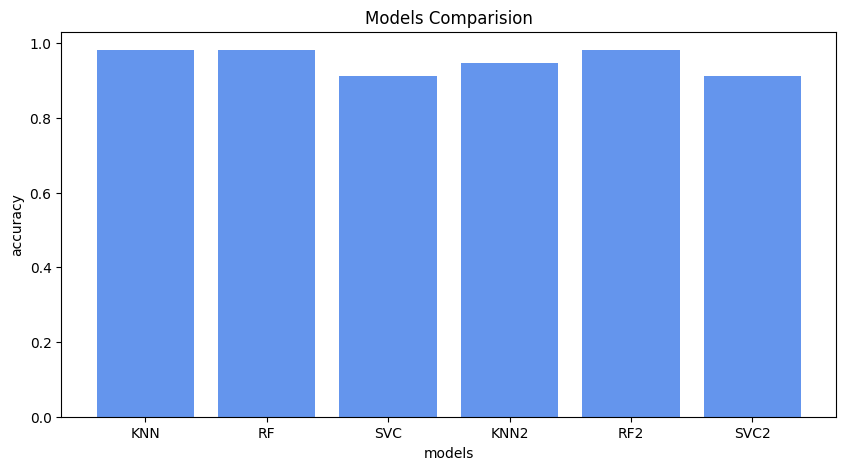

In [61]:
models = ["KNN", "RF", "SVC", "KNN2", "RF2", "SVC2"]
accuracy =[0.982, 0.982, 0.912, 0.947 , 0.982, 0.912]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color = "cornflowerblue")
plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("Models Comparision")
plt.show()
